# Mount Drive



# Importing Libraries and initializing stopwords and stemmer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip3 install texthero
!pip3 install transformers
!pip3 install tensorflow_addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.2 MB/s eta 0:00:00
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.5
    Uninstalling srsly-2.4.5:
      Successfully uninstalled srsly-2.4.5
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.6
    Uninstalling thinc-8.1.6:
      Successfully uninstalled thinc-8.1.6
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successful

In [ ]:
!pip install tweet-preprocessor

import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 828.9/828.9 KB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.6/492.6 KB 48.3 MB/s eta 0:00:00
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.2
    Uninstalling catalogue-1.0.2:
      Successfully uninstalled catalogue-1.0.2
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.6
    Uninstalling srsly-1.0.6:
      Successfully uninstalled srsly-1.0.6
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.6
    Uninstalling thinc-7.4.6:
      Successfully uninstalled thinc-7.4.6
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.9
    Uninstalling spacy-2.3.9:
      Successfully uninstalled spacy-2.3.9
ERROR: pip's dependency resolver does not currently 

In [ ]:
import re 
import nltk
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob,Word
from nltk.corpus import words
nltk.download('words')
nltk.download('wordnet')
import re
from texthero import stopwords

from nltk.corpus import wordnet #to be learned

import tensorflow as tf

from nltk.corpus import stopwords

import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.8/dist-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_sm' (3.4.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.5.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import texthero as hero 

In [ ]:
def lemma_per_pos(text):
    '''function to lemmatize according to part of speech tag'''
    lemmatizer = nltk.stem.WordNetLemmatizer()
    text=text.lower()
    text = [word for word in text.split(" ")]
    text= [lemmatizer.lemmatize(token, "v") for token in text] #Lemmatization
    return " ".join(text)

def df_preprocessing(df,feature_col):
    '''
    Preprocessing of dataframe
    '''
    stop = set(stopwords.words('english'))
    df[feature_col]= (df[feature_col].pipe(hero.lowercase).
                      pipe(hero.remove_urls).
                      pipe(hero.remove_digits).
                      pipe(hero.remove_punctuation).
                      pipe(hero.remove_html_tags) )
    # lemmatization
    df[feature_col]= [lemma_per_pos(sent) for sent in df[feature_col]]
    #df[col_name]= hero.remove_stopwords(df[col_name],custom_stopwords)
    return df

In [ ]:
from transformers import AutoTokenizer,TFDistilBertModel, DistilBertConfig
from transformers import TFAutoModel
import tensorflow as tf 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from transformers import AdamW, get_linear_schedule_with_warmup
import tensorflow_addons as tfa

# Reading Data


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/capstone/data/deceptive-opinion.csv") #Your respective address 
data.head()
## change data

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


## ONE HOT ENCODING CLASS LABELS

In [ ]:
def one_hot(data):
  column_names = ["text","Fake","Real"]
  test_df = pd.DataFrame(columns = column_names)

  for i in range(len(data)):
    text_temp = data['text'].iloc[i]
    if data['deceptive'].iloc[i] == "deceptive":
      test_df.loc[i] = [text_temp,1,0]
    elif data['deceptive'].iloc[i] == "truthful":
      test_df.loc[i] = [text_temp,0,1]
  return test_df


In [ ]:
with tf.device('/GPU:0'): 
  data1=one_hot(data[['text',"deceptive"]])

In [ ]:
data1

,text,Fake,Real
0,We stayed for a one night getaway with family ...,0,1
1,Triple A rate with upgrade to view room was le...,0,1
2,This comes a little late as I'm finally catchi...,0,1
3,The Omni Chicago really delivers on all fronts...,0,1
4,I asked for a high floor away from the elevato...,0,1
...,...,...,...
1595,Problems started when I booked the InterContin...,1,0
1596,The Amalfi Hotel has a beautiful website and i...,1,0
1597,The Intercontinental Chicago Magnificent Mile ...,1,0
1598,"The Palmer House Hilton, while it looks good i...",1,0


In [ ]:
target_col= data1.columns[1:]
feature_col=data1.columns[0:1]

#Preprocessing

In [ ]:
target_col,feature_col

(Index(['Fake', 'Real'], dtype='object'), Index(['text'], dtype='object'))

### preprocessing training and testing data

In [ ]:
with tf.device('/GPU:0'): 
  data_prp= df_preprocessing(data1,feature_col[0])

In [ ]:
#Creating tokenizer
def create_tokenizer(pretrained_weights='distilbert-base-uncased'):
  '''Function to create the tokenizer'''

  tokenizer = AutoTokenizer.from_pretrained(pretrained_weights)
  return tokenizer

#Tokenization of the data
def data_tokenization(dataset,max_len,tokenizer):
    '''dataset: Pandas dataframe with feature name is column name 
    Pretrained_weights: selected model 
    RETURN: [input_ids, attention_mask]'''

    tokens = dataset.apply(lambda x: tokenizer(x,return_tensors='tf', 
                                                            truncation=True,
                                                            padding='max_length',
                                                            max_length=max_len, 
                                                            add_special_tokens=True))
    input_ids= []
    attention_mask=[]
    for item in tokens:
        input_ids.append(item['input_ids'])
        attention_mask.append(item['attention_mask'])
    input_ids, attention_mask=np.squeeze(input_ids), np.squeeze(attention_mask)


    return [input_ids,attention_mask]

#Model 

In [ ]:
def distilbert_model(pretrained_weights,max_len,learning_rate):
  '''BERT model creation with pretrained weights
  INPUT:
  pretrained_weights: Language model pretrained weights
  max_len: input length '''
  print('Model selected:', pretrained_weights)
  bert=TFAutoModel.from_pretrained(pretrained_weights)
  
  # This is must if you would like to train the layers of language models too.
  for layer in bert.layers:
      layer.trainable = True

  # # parameter declaration
  # step = tf.Variable(0, trainable=False)
  # schedule = tf.optimizers.schedules.PiecewiseConstantDecay([10000, 15000], [2e-0, 2e-1, 1e-2])
  # # lr and wd can be a function or a tensor
  # lr = learning_rate * schedule(step)
  # wd = lambda:lr * schedule(step)
  # optimizer = tfa.optimizers.AdamW(learning_rate=lr, weight_decay=wd)

  # optimizer= tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')
  optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)

  # declaring inputs, BERT take input_ids and attention_mask as input
  input_ids= Input(shape=(max_len,),dtype=tf.int32,name='input_ids')
  attention_mask=Input(shape=(max_len,),dtype=tf.int32,name='attention_mask')

  bert= bert(input_ids,attention_mask=attention_mask)
  x= bert[0][:,0,:]
  x=tf.keras.layers.Dropout(0.05)(x)
  # x= tf.keras.layers.Dense(128)(x)
  x=tf.keras.layers.Dense(64)(x)
  x=tf.keras.layers.Dense(32)(x)

  output=tf.keras.layers.Dense(2,activation='sigmoid')(x)

  model=Model(inputs=[input_ids,attention_mask],outputs=[output])
  # compiling model 
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE,name='categorical_crossentropy'),
                metrics=['accuracy'])
  return model

In [ ]:
pretrained_weights='distilbert-base-uncased'
max_len=256
epochs=6
learning_rate=2e-5
batch_size= None

In [ ]:
tokenizer= create_tokenizer(pretrained_weights)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_prp['text'], data_prp[['Fake','Real']], test_size=0.3, random_state=1,shuffle =True)

In [ ]:
x_train= data_tokenization(X_train,max_len,tokenizer) 

In [ ]:
y_train= y_train[target_col].values
y_train = y_train.astype('int32')
y_train

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int32)

In [ ]:
y_train.shape

(1120, 2)

In [ ]:
distilbert=distilbert_model(pretrained_weights,max_len,learning_rate)
distilbert.summary()

Model selected: distilbert-base-uncased


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_projector', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 BertModel)                     ast_hidden_state=(N               'attention_mask[0][0]']         
                                one, 256, 768),                                                   
                                 hidden_states=None                                           

In [ ]:
with tf.device('/GPU:0'):
    distilbert.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/6


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


35/35 [==============================] - 33s 807ms/step - loss: 0.6271 - accuracy: 0.6723
Epoch 2/6
35/35 [==============================] - 29s 843ms/step - loss: 0.3354 - accuracy: 0.8562
Epoch 3/6
35/35 [==============================] - 29s 843ms/step - loss: 0.1712 - accuracy: 0.9330
Epoch 4/6
35/35 [==============================] - 29s 831ms/step - loss: 0.0832 - accuracy: 0.9696
Epoch 5/6
35/35 [==============================] - 29s 833ms/step - loss: 0.0757 - accuracy: 0.9705
Epoch 6/6
35/35 [==============================] - 29s 838ms/step - loss: 0.0144 - accuracy: 0.9964


## tokenizing test data

In [ ]:
x_test= data_tokenization(X_test,max_len,tokenizer)
x_test

[array([[ 101, 1996, 3319, ...,    0,    0,    0],
        [ 101, 2044, 5136, ...,    0,    0,    0],
        [ 101, 2065, 2017, ...,    0,    0,    0],
        ...,
        [ 101, 1045, 2994, ...,    0,    0,    0],
        [ 101, 1045, 3728, ...,    0,    0,    0],
        [ 101, 2043, 2017, ...,    0,    0,    0]], dtype=int32),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)]

In [ ]:
preds= distilbert.predict(x_test)

15/15 [==============================] - 5s 270ms/step


In [ ]:
preds.shape
predicted_test_labels=pd.DataFrame(preds)

In [ ]:
predicted_test_labels

,0,1
0,0.020912,0.907944
1,0.997467,0.029302
2,0.999272,0.003658
3,0.996891,0.018209
4,0.999319,0.010099
...,...,...
475,0.991072,0.093985
476,0.010933,0.976208
477,0.985152,0.060255
478,0.999966,0.003120


In [ ]:
predicted_test_labels.columns=["Fake","Real"]

In [ ]:
pred_labels=[]
for i in range(predicted_test_labels.shape[0]):
  temp = max(predicted_test_labels['Fake'].iloc[i],predicted_test_labels['Real'].iloc[i])
  if temp == predicted_test_labels['Fake'].iloc[i]:
    pred_labels.append('Fake')
  elif temp == predicted_test_labels['Real'].iloc[i]:
    pred_labels.append('Real')

In [ ]:
true_labels = y_test.apply(lambda x: 'Fake' if x['Fake'] == 1 else 'Real', axis=1)
#true_labels = true_labels.replace({'Fake': 1, 'Real': 0})

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
true_labels=list(true_labels)

## performance on test data 

In [ ]:
print(classification_report(true_labels,pred_labels))

              precision    recall  f1-score   support

        Fake       0.80      0.96      0.87       252
        Real       0.94      0.73      0.82       228

    accuracy                           0.85       480
   macro avg       0.87      0.85      0.85       480
weighted avg       0.87      0.85      0.85       480



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

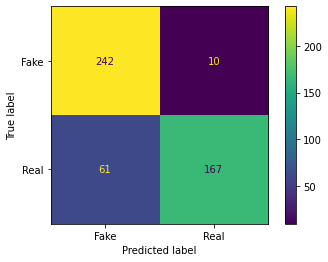

In [ ]:
cm = confusion_matrix(true_labels, pred_labels, labels=["Fake","Real"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Fake","Real"])
disp.plot()
plt.show()